# Iris Dataset Classification with apenet's Neural Network

This notebook demonstrates how to build, train, and evaluate a neural network model using the apenet library, using the Iris Dataset as an example.

## Import Libraries

In [24]:
import torch
## Data processing
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import our library
from apenet.models.builder import ModelBuilder
from apenet.train.trainer import Trainer
from apenet.utils.data import train_test_split
from apenet.loss.losses import CrossEntropyLoss
from apenet.optimizers.optimizers import StochGradDescent

## Set device

In [2]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
device = "cpu"
print(f"Using device: {device}")

Using device: cpu


# Data Overview

## Load and Preprocess Data


In [3]:
# Load and preprocess data
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

## Data Visualization

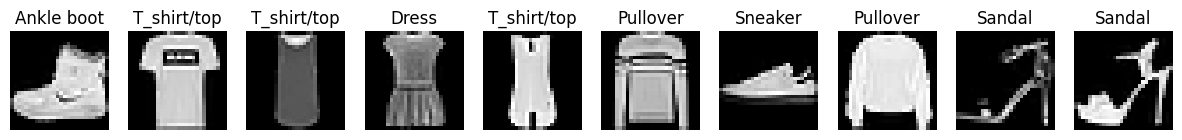

In [4]:
# Visualize some examples from the dataset
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(class_names[y.astype(int)[i]])
    ax.axis('off')
plt.show()

## Data Preprocessing


In [5]:
X = torch.tensor(X / 255.0, dtype=torch.float32, device=device)
y = torch.tensor(y.astype(int), dtype=torch.long, device=device)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Print the sizes of the training and test datasets
print(f"Training dataset size: {X_train.shape}")
print(f"Test dataset size: {X_test.shape}")

Training dataset size: torch.Size([56000, 784])
Test dataset size: torch.Size([14000, 784])


# Model Overview

## Create Model


In [18]:
builder = ModelBuilder()
input_size = X_train.shape[1]
num_classes = len(torch.unique(y_train))
hidden_sizes = [512, 256, 256, 128, 64]

model = builder.build_mlp(
    input_size=input_size,
    hidden_sizes=hidden_sizes,
    output_size=num_classes,
    hidden_activation='relu',
    output_activation=None,
    initializer='Xavier'
).to(device)

learning_rate = 0.01
epochs = 300
batch_size = 128

## Define Loss Function and Optimizer


In [19]:
loss_fn = CrossEntropyLoss()
optimizer = StochGradDescent(model.get_parameters(), learning_rate=learning_rate)

## Create Trainer


In [20]:
# Create trainer
trainer = Trainer(model, loss_fn, optimizer)

## Train Model


In [21]:
# Train model
history = trainer.train(
    epochs=epochs,
    batch_size=batch_size,
    verbose=10,
    X_train=X_train, y_train=y_train, X_val=X_test, y_val=y_test
)


Epoch 1/300: train_loss=2.2363, train_accuracy=0.2592, val_loss=2.1453, val_accuracy=0.3250
Epoch 11/300: train_loss=0.7649, train_accuracy=0.7252, val_loss=0.7501, val_accuracy=0.7316
Epoch 21/300: train_loss=0.5961, train_accuracy=0.8012, val_loss=0.5917, val_accuracy=0.8000
Epoch 31/300: train_loss=0.5177, train_accuracy=0.8239, val_loss=0.5189, val_accuracy=0.8212
Epoch 41/300: train_loss=0.4748, train_accuracy=0.8363, val_loss=0.4765, val_accuracy=0.8364
Epoch 51/300: train_loss=0.4475, train_accuracy=0.8438, val_loss=0.4516, val_accuracy=0.8418
Epoch 61/300: train_loss=0.4265, train_accuracy=0.8501, val_loss=0.4330, val_accuracy=0.8485
Epoch 71/300: train_loss=0.4103, train_accuracy=0.8565, val_loss=0.4194, val_accuracy=0.8526
Epoch 81/300: train_loss=0.3964, train_accuracy=0.8619, val_loss=0.4076, val_accuracy=0.8561
Epoch 91/300: train_loss=0.3843, train_accuracy=0.8659, val_loss=0.3964, val_accuracy=0.8610
Epoch 101/300: train_loss=0.3740, train_accuracy=0.8690, val_loss=0.389

## Evaluate Model


In [22]:
# Evaluate model
metrics = trainer.evaluate(X_test, y_test)
print(f"Test Loss: {metrics['loss']:.4f}, Test Accuracy: {metrics['accuracy']:.4f}")

Test Loss: 0.3287, Test Accuracy: 0.8849


## Plot Training History


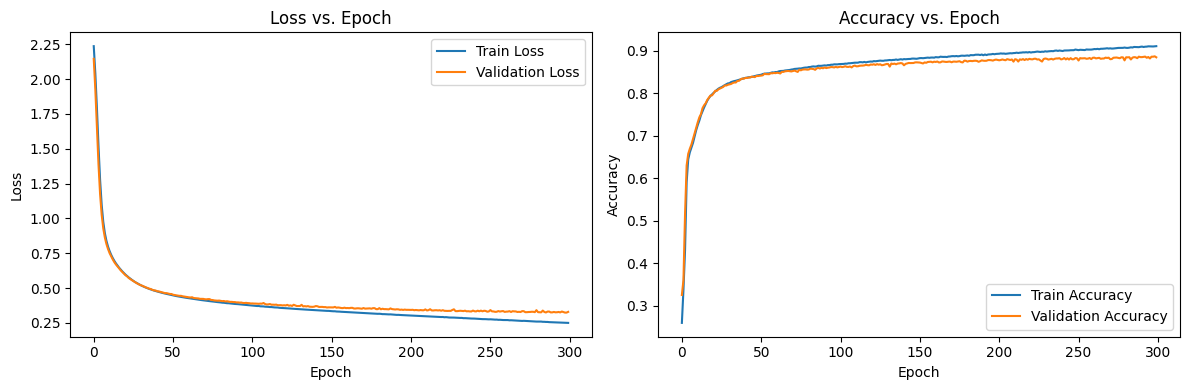

In [23]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()

plt.tight_layout()
plt.show()
